# Datenset der Seattle Library Checkouts
In diesem Jupyter Notebook sollen die Checkout Daten aus dem Jahr 2018 der Bibliothek betrachtet werden. Dabei werden folgende Fragen bearbeitet und die Ergebnisse Präsentiert:

- Welches Medium wurde in welchem Monat am meisten ausgeliehen?
- Wie ist das verhältnis zwischen Digitalen und Analogen Medien?
- Wie viele Medien haben nur eine Ausleihe

Die Daten werden dabei über einen Befehl von der Seite der data.seattle.gov heruntergeladen und in einer csv Datei lokal auf dem Computer gespeichert der das Jupyter Notebook ausführt.

In [1]:
# Zunächst werden zusätzliche Bibliotheken importiert um den Umfang der Python Befehle zu erweitern:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Variabeln für den Download und speichern der Daten
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=2665099"
co_file = "checkoutsSL2018.csv"

In [3]:
# Download der Daten, dafür wird die importierte Bibliothek urllib.request benutzt:
urllib.request.urlretrieve(url, co_file)

('checkoutsSL2018.csv', <http.client.HTTPMessage at 0x20302986308>)

In [4]:
# Variable für das lesen der co_file mit hilfe der Panda Bibliothek:
checkout = pd.read_csv(co_file)

In [5]:
# Über die Erstellte Variable checkout kann nun teile der csv Datei angezeigt werden: 
checkout

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014]
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.
2,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012]
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017]
...,...,...,...,...,...,...,...,...,...,...,...
2665093,Digital,Hoopla,MUSIC,2018,1,1,The Snow Queen,NaN,Pop,LIGHTYEAR,NaN
2665094,Physical,Horizon,BOOK,2018,1,4,There was an old lady who swallowed a fly / il...,NaN,"Nonsense verses Juvenile literature, Folk song...","Child's Play,",2002.
2665095,Physical,Horizon,BOOK,2018,1,2,The book of night women / Marlon James.,"James, Marlon, 1970-","Slaves Fiction, Jamaica Fiction, Historical fi...","Riverhead Books,",2010.
2665096,Physical,Horizon,BOOK,2018,1,1,Hunting Eve / Iris Johansen.,"Johansen, Iris","Duncan Eve Fictitious character Fiction, Track...","St. Martin's Press,",2013.


In [6]:
# Für die weitere bearbeitung ist das auflisten der Zeilenüberschriften von Vorteil:
checkout.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

## Frage 1: Welches Medium wurde in welchem Monat am meisten ausgeliehen?

In [7]:
# Welcher Wert ist der höhste in der Spalte checkouts?
checkout.checkouts.max()

2073

In [8]:
# Den Wert aus der vorherigen Abfrage speichern wir in einer neuen Variable:
maxch = checkout.checkouts.max()

In [9]:
# Da wir uns in dieser Abfrage nur für bestimmte teile der Tabelle interessieren, schränken wir diese auf die Spalten Checkouts, 
# checkoutmonth und Titel ein
checkout [["checkouts", "title", "checkoutmonth"]]

,checkouts,title,checkoutmonth
0,1,"Naruto. Vol. 65, Hashirama and Madara / story ...",12
1,2,Oishisō na shirokuma / Shibata Keiko.,12
2,7,Like crazy / Paramount Vantage ; Indian Paintb...,12
3,3,Catch a Falling Heiress: American Heiress In L...,12
4,1,Literally show me a healthy person / Darcie Wi...,12
...,...,...,...
2665093,1,The Snow Queen,1
2665094,4,There was an old lady who swallowed a fly / il...,1
2665095,2,The book of night women / Marlon James.,1
2665096,1,Hunting Eve / Iris Johansen.,1


In [10]:
# Die neu erstellte Ansicht speichern wir in folgender Variable:
checktitelmonth = checkout [["checkouts", "title", "checkoutmonth"]]

In [11]:
# Jetzt fragen wir die Tabelle nach der Wert von "maxch" ab:
checktitelmonth[checktitelmonth["checkouts"] >= maxch]

,checkouts,title,checkoutmonth
594530,2073,FlexTech--Laptops.,10


In [12]:
# Jetzt definieren wir noch das Ergebniss als Loesung1:
Loesung1 = checktitelmonth[checktitelmonth["checkouts"] >= maxch]
Loesung1

,checkouts,title,checkoutmonth
594530,2073,FlexTech--Laptops.,10


## Frage 2: Wie ist das Verhältniss von digitalen zu analogen Medien? 

In [13]:
# Für die Beantwortung der Frage brauchen wir nur die Spalte "usageclass"
checkout [["usageclass"]]

,usageclass
0,Physical
1,Physical
2,Physical
3,Digital
4,Physical
...,...
2665093,Digital
2665094,Physical
2665095,Physical
2665096,Physical


In [14]:
# Aus der Spalte Zählen wir die Anzahl an "Physical" und "Digital"
Physical = checkout[checkout['usageclass'] == 'Physical'].count()[0]
Digital = checkout[checkout['usageclass'] == 'Digital'].count()[0]


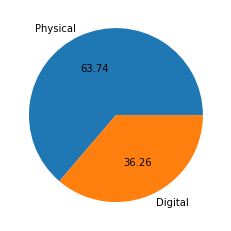

In [15]:
# Diese Werte können wir uns anschaulich in einem Kuchen-Diagramm anzeigen lassen:
labels = ['Physical', 'Digital',]
plt.pie([Physical, Digital], labels = labels, autopct='%.2f')
plt.show()

## Frage 3: Wie viele Medien haben nur eine Ausleihe?

In [16]:
# Zunächst verkleiner wir wieder die Ansicht auf den Bereich "checkouts", da der Rest für diese Frage nicht relevant ist:
co1 = checkout [["checkouts"]]
co1

,checkouts
0,1
1,2
2,7
3,3
4,1
...,...
2665093,1
2665094,4
2665095,2
2665096,1


In [17]:
# Zur Überprüfung lassen wir uns den niedrigsten Wert anzeigen:
checkout.checkouts.min()

1

In [18]:
# Diesen Wert speichern wir in die Variable "minch"
minch = checkout.checkouts.min()

In [19]:
# Hier fragen wir die Ansicht "co1" nach der Variable "minch" ab und speichern das Ergebniss in der neuen Variable "only2checkout"
only1checkout = co1[co1["checkouts"] <= minch]
only1checkout

,checkouts
0,1
4,1
5,1
11,1
13,1
...,...
2665089,1
2665091,1
2665093,1
2665096,1


In [20]:
# Um jetzt die Anzahl von minch bekommen fragen wir mit shape die größe des Ergebniss ab,
# da an dieser Stelle bereits alle Ausleihe über 1 herausgefilter wurden
Loesung3 = only1checkout.shape

In [22]:
# # Jetzt definieren wir noch das Ergebniss als Loesung3:
Loesung3

(1282319, 1)